In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

In [3]:
df = pd.read_csv("data/sales_data2.csv", parse_dates=["date"])

## Part 1: Data Exploration
1. Display the first 5 rows of the DataFrame.
2. Show the basic information about the DataFrame (data types, non-null counts).
3. Calculate and display summary statistics for the numerical columns.

In [4]:
display(df.head(5))
df.info()
df[["quantity", "unit_price", "total_sales"]].describe()

,date,product,category,quantity,unit_price,total_sales
0,2023-01-15,Laptop,Electronics,5,899.99,4499.95
1,2023-01-16,T-shirt,Clothing,20,19.99,399.80
2,2023-01-17,Coffee Maker,Home Appliances,8,59.99,479.92
3,2023-01-18,Running Shoes,Footwear,12,79.99,959.88
4,2023-01-19,Smartphone,Electronics,3,599.99,1799.97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         15 non-null     datetime64[ns]
 1   product      15 non-null     object        
 2   category     15 non-null     object        
 3   quantity     15 non-null     int64         
 4   unit_price   15 non-null     float64       
 5   total_sales  15 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 852.0+ bytes


,quantity,unit_price,total_sales
count,15.000000,15.000000,15.000000
mean,10.600000,177.990000,1123.227333
std,6.378535,249.576785,1053.829201
min,3.000000,19.990000,329.890000
25%,6.000000,49.990000,479.930000
50%,9.000000,79.990000,749.850000
75%,13.500000,149.990000,1254.785000
max,25.000000,899.990000,4499.950000


## Part 2: Data Manipulation
1. Create a new column called 'month' that extracts the month from the 'date' column.
2. Convert the 'total_sales' column to a floating-point data type.
3. Sort the DataFrame by 'total_sales' in descending order and display the top 3 rows.

In [5]:
df["month"] = df["date"].dt.month_name()

# 2 is done automatically by pandas

df.sort_values("total_sales", ascending=False).head(3)

,date,product,category,quantity,unit_price,total_sales,month
0,2023-01-15,Laptop,Electronics,5,899.99,4499.95,January
4,2023-01-19,Smartphone,Electronics,3,599.99,1799.97,January
10,2023-03-10,Smartwatch,Electronics,9,199.99,1799.91,March


## Part 3: Grouping and Aggregation
1. Group the data by 'category' and calculate the total sales for each category.
2. Find the product with the highest quantity sold in each category.
3. Calculate the average unit price for each month.

In [6]:
df.groupby("category")["total_sales"].sum()

df.set_index("product").groupby("category")[["quantity"]].idxmax()

df.groupby("month")["unit_price"].mean()

month
February    115.99
January     331.99
March        85.99
Name: unit_price, dtype: float64

## Part 4: Data Filtering
1. Create a new DataFrame containing only the 'Electronics' category items.
2. Filter the original DataFrame to show all products with a unit price greater than $100.
3. Find all sales that occurred on weekends (assume the dataset covers a period where the 15th was a Sunday).

In [7]:
only_electronics = df[df["category"] == "Electronics"]

high_unit_price = df[df["unit_price"] > 100]

df[df["date"].dt.day_name().isin(["Saturday", "Sunday"])]

,date,product,category,quantity,unit_price,total_sales,month
0,2023-01-15,Laptop,Electronics,5,899.99,4499.95,January
8,2023-02-04,Dress Shoes,Footwear,7,99.99,699.93,February
9,2023-02-05,Blender,Home Appliances,10,39.99,399.90,February
11,2023-03-11,Jacket,Clothing,6,79.99,479.94,March
12,2023-03-12,Toaster,Home Appliances,11,29.99,329.89,March


## Part 5: Data Visualization
1. Create a bar plot showing total sales by category.
2. Generate a line plot displaying the trend of total sales over time.
3. Produce a scatter plot of quantity vs. unit price, with points colored by category.

Remember to include appropriate labels, titles, and legends in your visualizations.

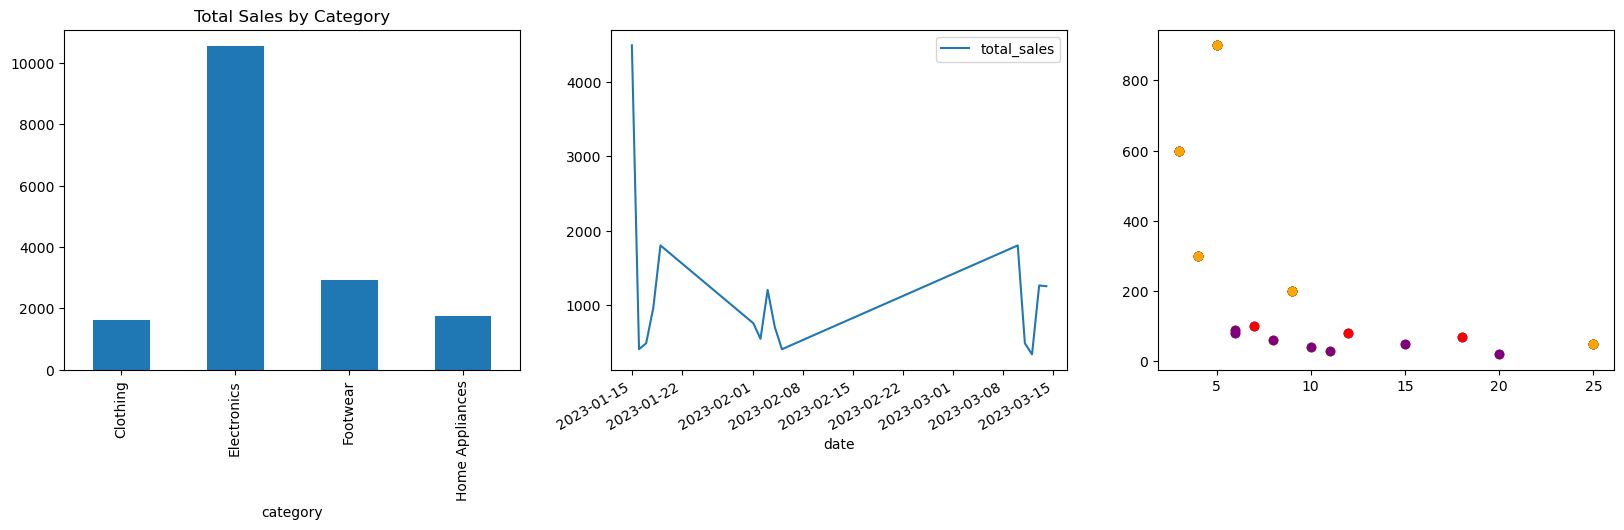

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

df.groupby("category")["total_sales"].sum().plot.bar(ax=ax1, title="Total Sales by Category")

df.plot(ax=ax2, x="date", y="total_sales")

colors = ["red", "orange", "yellow", "green", "blue", "purple"]
for i in df[["category"]].values:
    filtered = df[df["category"] == i[0]]
    ax3.scatter(filtered["quantity"], filtered["unit_price"], color=r.choice(colors))


In [13]:
for i in df[["category"]].values:
    print(i[0])

Electronics
Clothing
Home Appliances
Footwear
Electronics
Clothing
Home Appliances
Electronics
Footwear
Home Appliances
Electronics
Clothing
Home Appliances
Footwear
Electronics
